# Importing Required Libraries


In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
import pickle

In [171]:
df = pd.read_csv('laptop_price2.csv')


In [172]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [173]:
df.rename(columns = {'Price_in_euros':'Price_in_rupees'}, inplace = True)

df['Price_in_rupees'] = df['Price_in_rupees'] * 89.75
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120237.1775
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80679.8650
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51606.2500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227736.1375
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161873.1000


In [174]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_rupees   1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Checking if data is clean

In [175]:
df.duplicated().sum()


0

In [176]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_rupees     0
dtype: int64

In [177]:
df.drop(columns=['laptop_ID'],inplace=True)

In [178]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120237.1775
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80679.8650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51606.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227736.1375
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161873.1000


In [179]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_in_rupees   1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


In [180]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000


# Data analysis (Univariate and Bivariate)

C:\Users\91922\AppData\Local\Temp\ipykernel_1432\3042267445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_in_rupees'])


<AxesSubplot:xlabel='Price_in_rupees', ylabel='Density'>

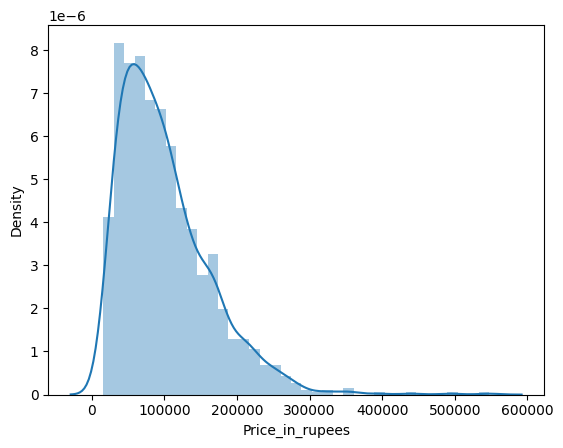

In [181]:
sns.distplot(df['Price_in_rupees'])

<AxesSubplot:>

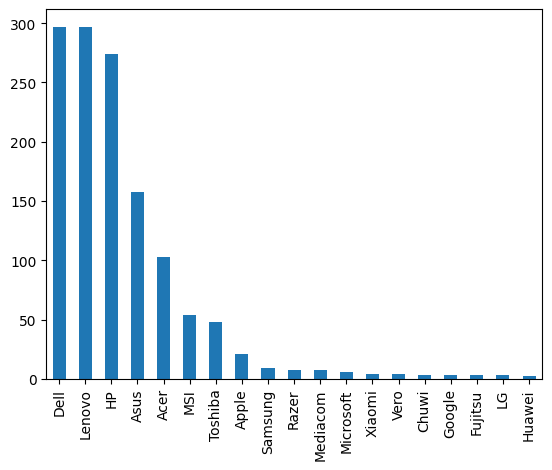

In [182]:
df['Company'].value_counts().plot(kind='bar')

## Comparing average prices of Different Companies


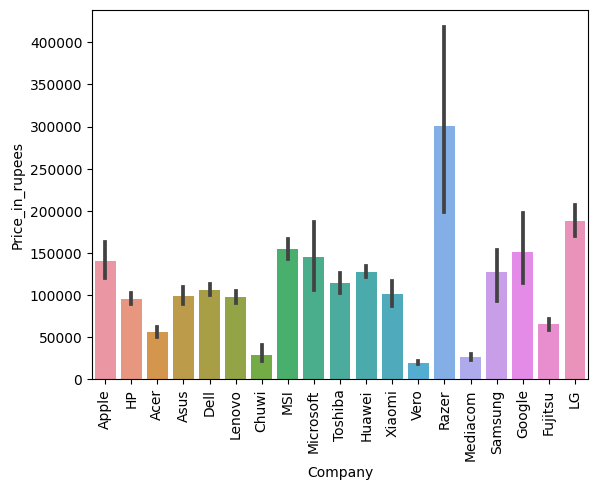

In [183]:
sns.barplot(x=df['Company'],y=df['Price_in_rupees'])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:>

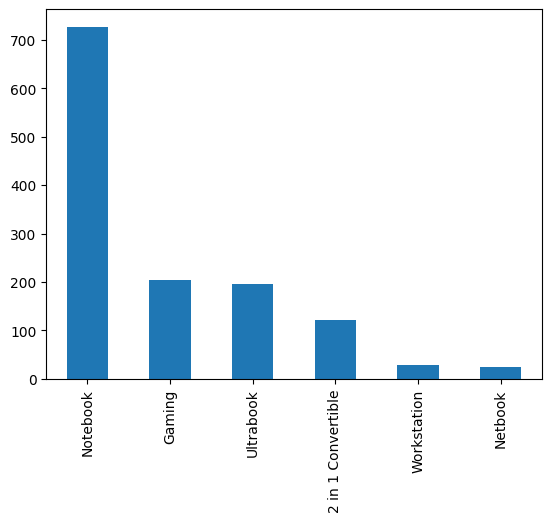

In [184]:
df['TypeName'].value_counts().plot(kind='bar')

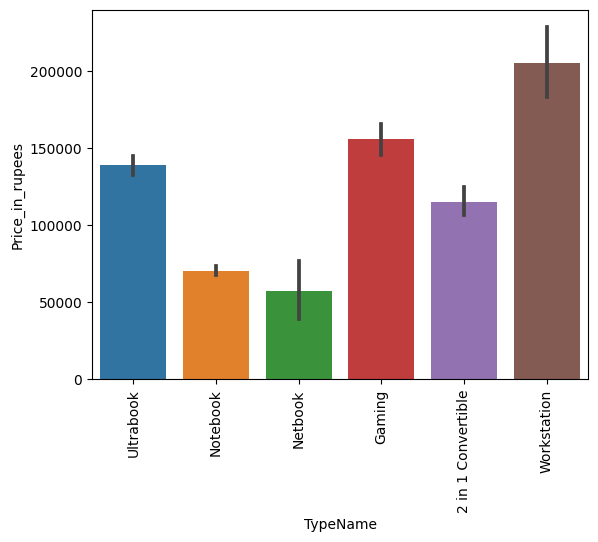

In [185]:
sns.barplot(x=df['TypeName'],y=df['Price_in_rupees'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\91922\AppData\Local\Temp\ipykernel_1432\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<AxesSubplot:xlabel='Inches', ylabel='Density'>

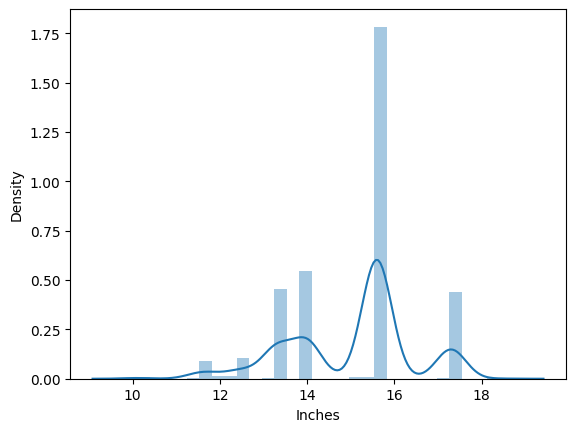

In [186]:
sns.distplot(df['Inches'])

In [187]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

# Feature Engineering for Screen Resolution

In [188]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0


<AxesSubplot:>

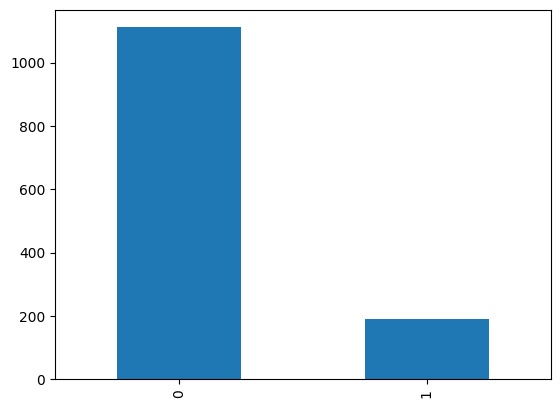

In [189]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_in_rupees'>

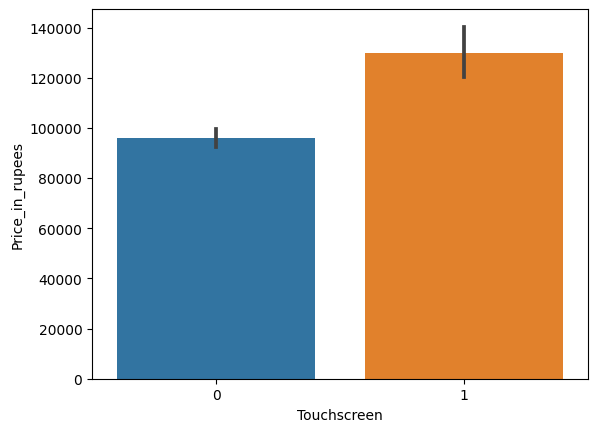

In [190]:
sns.barplot(x=df['Touchscreen'], y = df['Price_in_rupees'])

In [191]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1


<AxesSubplot:>

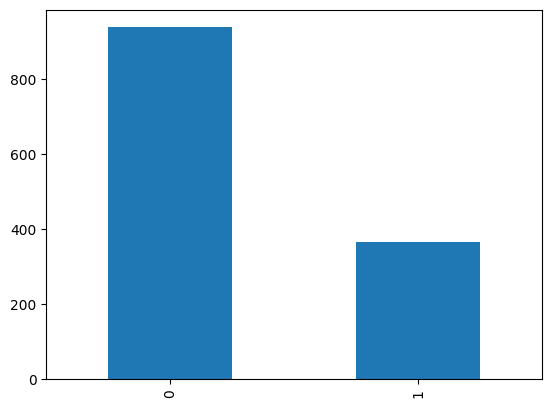

In [192]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price_in_rupees'>

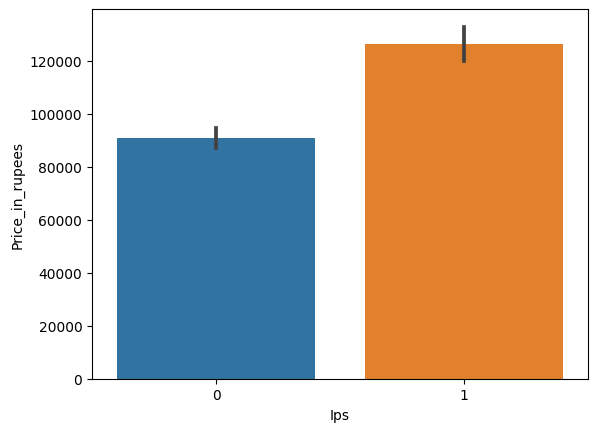

In [193]:
sns.barplot(x=df['Ips'], y = df['Price_in_rupees'])

In [194]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)


In [195]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [196]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,IPS Panel Retina Display 2560,1600


In [197]:
df['X_res']=df['X_res'].str.replace(',','').str.findall('(\d+\.?\d+)').apply(lambda x:x[0])
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,2560,1600


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_in_rupees   1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [199]:
df.corr()['Price_in_rupees']

Inches             0.068197
Ram                0.743007
Weight             0.210370
Price_in_rupees    1.000000
Touchscreen        0.191226
Ips                0.252208
X_res              0.556529
Y_res              0.552809
Name: Price_in_rupees, dtype: float64

In [200]:
df['PPI']=((((df['X_res']**2+df['Y_res']**2))**0.5)/df['Inches']).astype('float')
df.corr()['Price_in_rupees']

Inches             0.068197
Ram                0.743007
Weight             0.210370
Price_in_rupees    1.000000
Touchscreen        0.191226
Ips                0.252208
X_res              0.556529
Y_res              0.552809
PPI                0.473487
Name: Price_in_rupees, dtype: float64

#### Data cleaning (Dropping columns which are unnecessary)

In [201]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [202]:
df.drop(columns=['Product'],inplace=True)

In [203]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005


# Feature Engineering on Cpu column

In [204]:
df['Cpu Name']= df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5


In [205]:
def fetch_processor(text):
    if text == "Intel Core i7" or text =="Intel Core i5" or text =="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"


In [206]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [207]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name,Cpu Brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

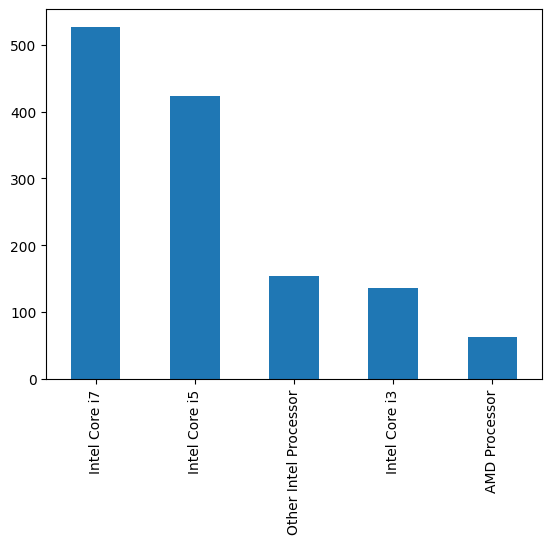

In [208]:
df['Cpu Brand'].value_counts().plot(kind='bar')

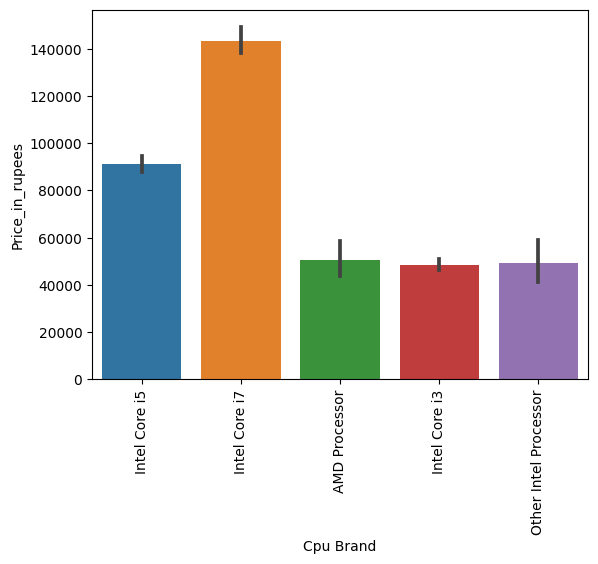

In [209]:
sns.barplot(x=df['Cpu Brand'],y=df['Price_in_rupees'])
plt.xticks(rotation='vertical')
plt.show()

In [210]:
df.drop(columns=['Cpu','Cpu Name'])

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,57260.5000,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,134535.2500,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,20552.7500,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,68569.0000,0,0,100.454670,Intel Core i7


# Feature Engineering on Ram column

<AxesSubplot:>

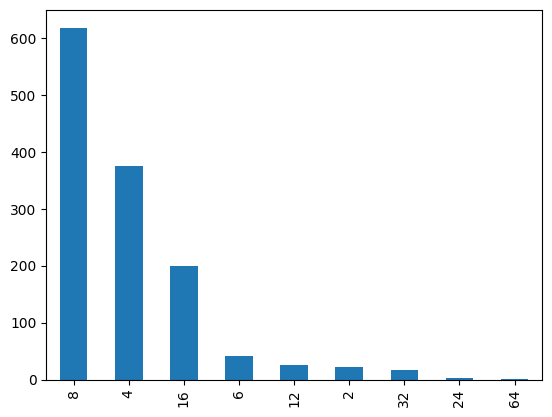

In [211]:
df['Ram'].value_counts().plot(kind='bar')

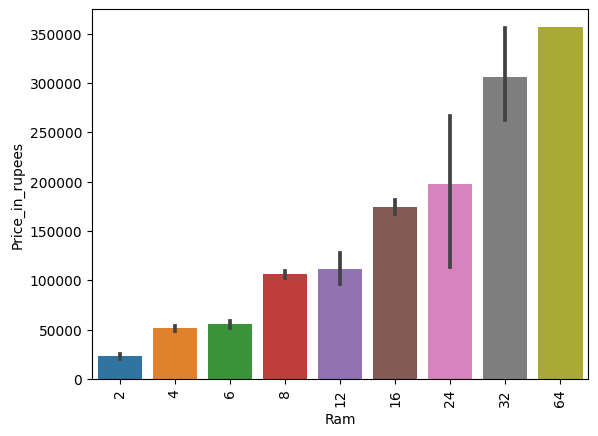

In [212]:
sns.barplot(x=df['Ram'],y=df['Price_in_rupees'])
plt.xticks(rotation='vertical')
plt.show()

# Feature Engineering on Memory column

In [213]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [214]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split("+",n=1,expand=True)

df['first']=new[0]
df['first']=df['first'].str.strip()

df['second'] = new[1]

df['Layer1HDD'] = df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']= df['first'].str.replace(r'\D','')
df['second'].fillna("0",inplace=True)

df["Layer2HDD"] = df['second'].apply(lambda x:1 if "HDD" in x else 0)
df["Layer2SSD"] = df['second'].apply(lambda x:1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D','')

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD'] = (df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

df.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)





C:\Users\91922\AppData\Local\Temp\ipykernel_1432\3762740065.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']= df['first'].str.replace(r'\D','')
C:\Users\91922\AppData\Local\Temp\ipykernel_1432\3762740065.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


In [215]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [216]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
194,Dell,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1000 HDD,Intel UHD Graphics 620,Windows 10,1.62,75300.2500,1,1,165.632118,Intel Core i7,Intel Core i7,1000,0,0,0
1079,HP,Notebook,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500 HDD,Intel HD Graphics 520,Windows 7,2.31,84365.0000,0,0,141.211998,Intel Core i5,Intel Core i5,500,0,0,0
752,Asus,Notebook,1366x768,Intel Core i5 6300HQ 2.3GHz,4,1000 HDD,Nvidia GeForce GTX 950M,No OS,2.45,51965.2500,0,0,100.454670,Intel Core i5,Intel Core i5,1000,0,0,0
36,Acer,Notebook,1366x768,Intel Core i3 7130U 2.7GHz,4,1000 HDD,Intel HD Graphics 620,Linux,2.10,32938.2500,0,0,100.454670,Intel Core i3,Intel Core i3,1000,0,0,0
748,Dell,Notebook,1366x768,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,101122.2225,0,0,111.935204,Intel Core i5,Intel Core i5,0,256,0,0


In [217]:
df.drop(columns=['Memory'],inplace=True)

In [218]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [219]:
df.corr()['Price_in_rupees']

Ram                0.743007
Weight             0.210370
Price_in_rupees    1.000000
Touchscreen        0.191226
Ips                0.252208
PPI                0.473487
HDD               -0.096441
SSD                0.670799
Hybrid             0.007989
Flash_Storage     -0.040511
Name: Price_in_rupees, dtype: float64

In [220]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

# Feature Engineering on Gpu column

In [221]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [222]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [223]:
df = df[df['Gpu_Brand']!="ARM"]

In [224]:
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

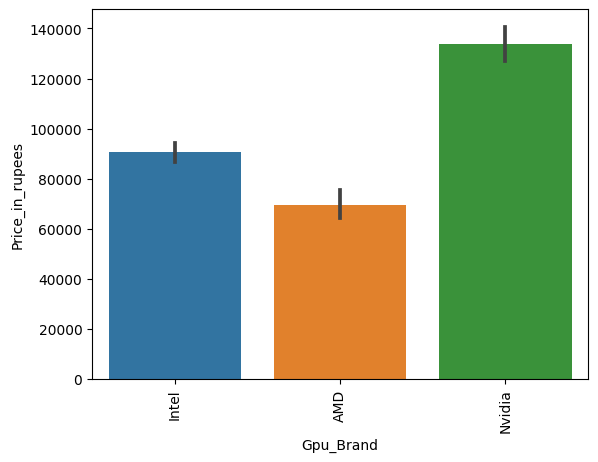

In [225]:
sns.barplot(x=df['Gpu_Brand'],y=df['Price_in_rupees'])
plt.xticks(rotation='vertical')
plt.show()

In [226]:
df.drop(columns=['Gpu'],inplace=True)

In [227]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

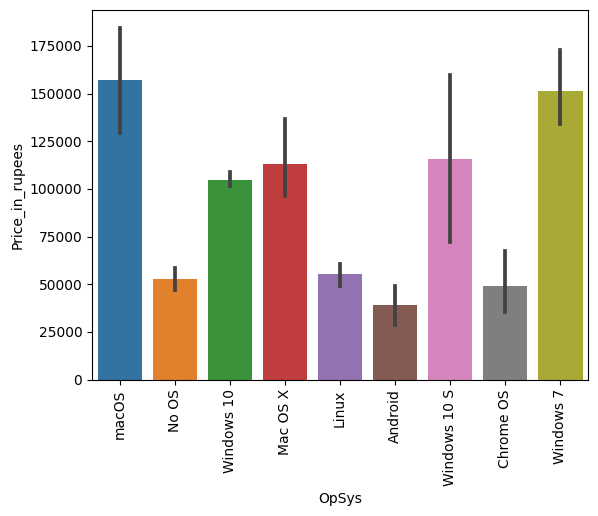

In [228]:
sns.barplot(x=df['OpSys'],y=df['Price_in_rupees'])
plt.xticks(rotation='vertical')
plt.show()

In [229]:
def cat_ops(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp =="macOS" or inp=="Mac OS X":
        return 'Mac'
    else:
        return "Others"
    
    

In [230]:
df['OS'] = df['OpSys'].apply(cat_ops)

In [231]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_in_rupees,Touchscreen,Ips,PPI,Cpu Name,Cpu Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,macOS,1.37,120237.1775,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,macOS,1.34,80679.8650,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,51606.2500,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,macOS,1.83,227736.1375,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,macOS,1.37,161873.1000,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac


In [232]:
df.drop(columns=['OpSys'],inplace=True)

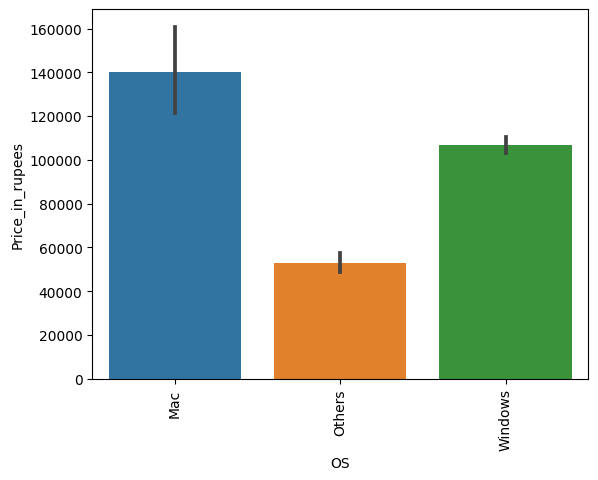

In [233]:
sns.barplot(x=df['OS'],y=df['Price_in_rupees'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\91922\AppData\Local\Temp\ipykernel_1432\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<AxesSubplot:xlabel='Weight', ylabel='Density'>

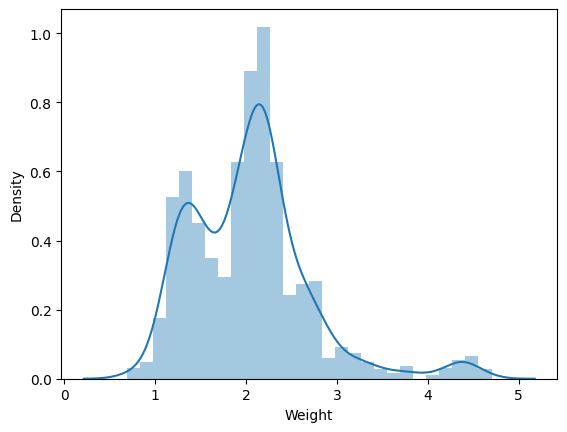

In [234]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price_in_rupees'>

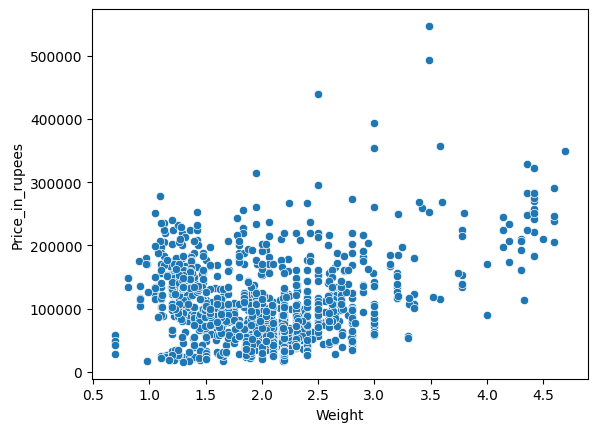

In [235]:
sns.scatterplot(x = df['Weight'],y = df['Price_in_rupees'])

In [236]:
df.corr()['Price_in_rupees']

Ram                0.742905
Weight             0.209867
Price_in_rupees    1.000000
Touchscreen        0.192917
Ips                0.253320
PPI                0.475368
HDD               -0.096891
SSD                0.670660
Name: Price_in_rupees, dtype: float64

# Heat map to find if there is any Multicollinearity


<AxesSubplot:>

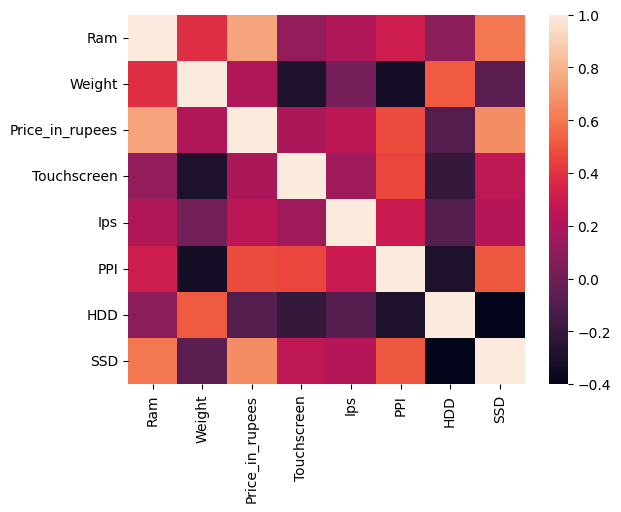

In [237]:
sns.heatmap(df.corr())

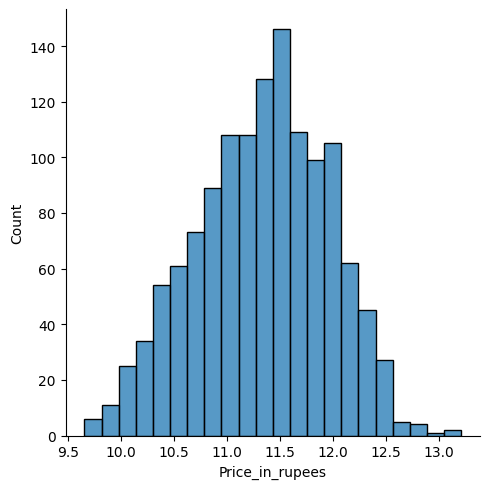

In [238]:
sns.displot(np.log(df['Price_in_rupees']))

In [239]:
df.drop(columns=['Cpu','Cpu Name','ScreenResolution'],inplace=True)

# Setting Independent And Dependent Variable

In [240]:
X= df.drop(columns=['Price_in_rupees'])
y = np.log(df['Price_in_rupees'])
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu_Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [243]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.15,random_state=2)

# Performing One Hot Encoding for categorical columns and then Linear Regression

In [245]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print("R2 Score",r2_score(Y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(Y_test,y_pred))


R2 Score 0.8073277448418655
Mean Absolute Error 0.21017827976428918


# Ridge Regression

In [246]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print("R2 Score",r2_score(Y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(Y_test,y_pred))

R2 Score 0.8127331031311806
Mean Absolute Error 0.20926802242582976


# Lasso Regression

In [252]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print("R2 Score",r2_score(Y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(Y_test,y_pred))

R2 Score 0.8071853945317105
Mean Absolute Error 0.2111436161347257


# Decision Tree Regressor

In [259]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print("R2 Score",r2_score(Y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(Y_test,y_pred))

R2 Score 0.8341399530139332
Mean Absolute Error 0.1845404777008702


# Random Forest Regression

In [272]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=17)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print("R2 Score",r2_score(Y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(Y_test,y_pred))

R2 Score 0.8874121155804093
Mean Absolute Error 0.15766109937441158


## Exporting the model

In [278]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))